In [45]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [46]:
def show_mask(mask, ax):
    color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

In [47]:
image = cv2.imread('occupiedSpace.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

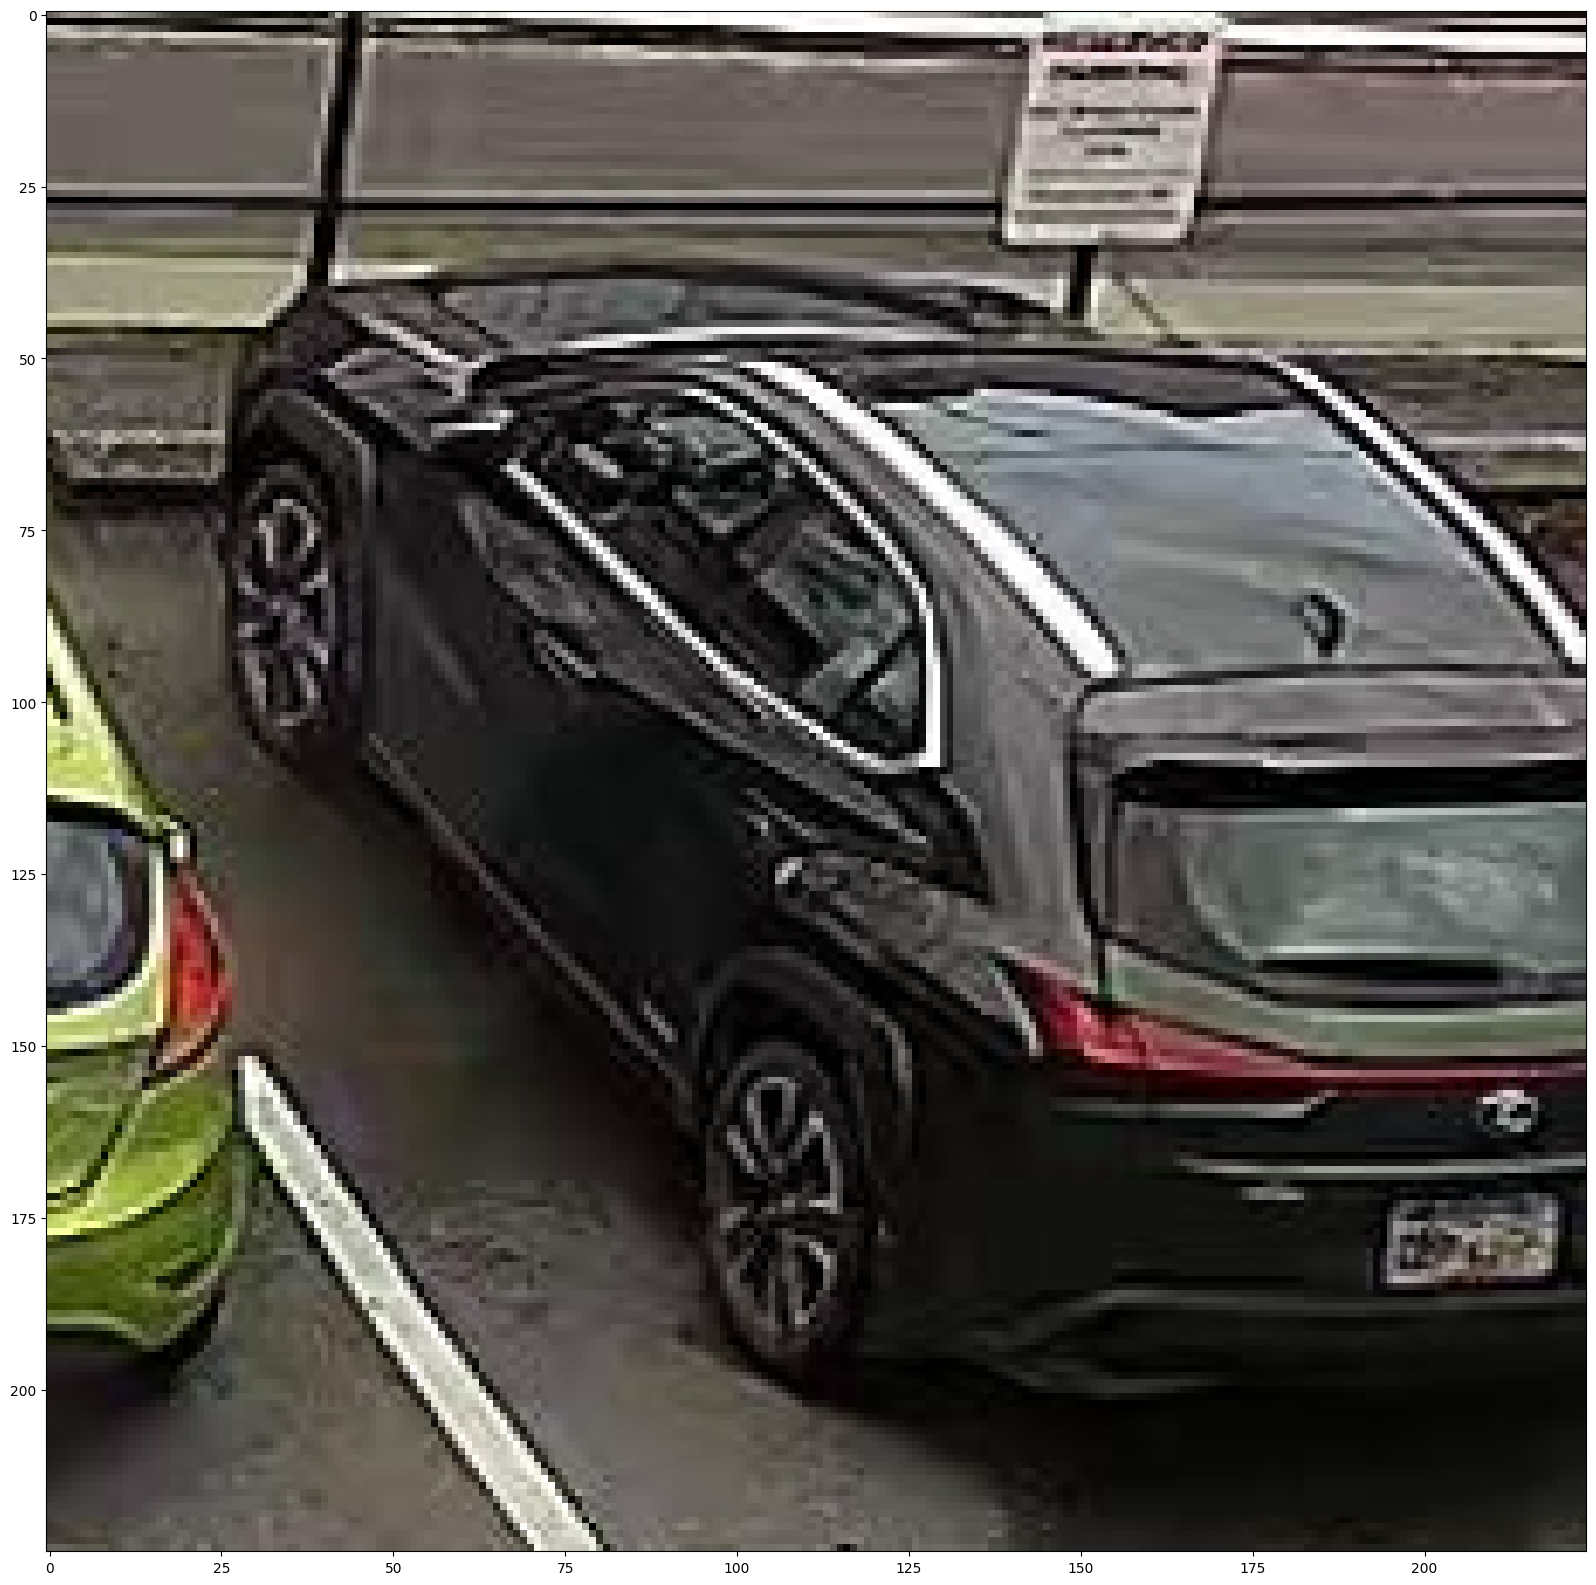

In [48]:
plt.figure(figsize=(20,20))
plt.imshow(image)

In [49]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda"

In [50]:
from segment_anything import sam_model_registry, SamPredictor

In [51]:
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

In [52]:
predictor.set_image(image)

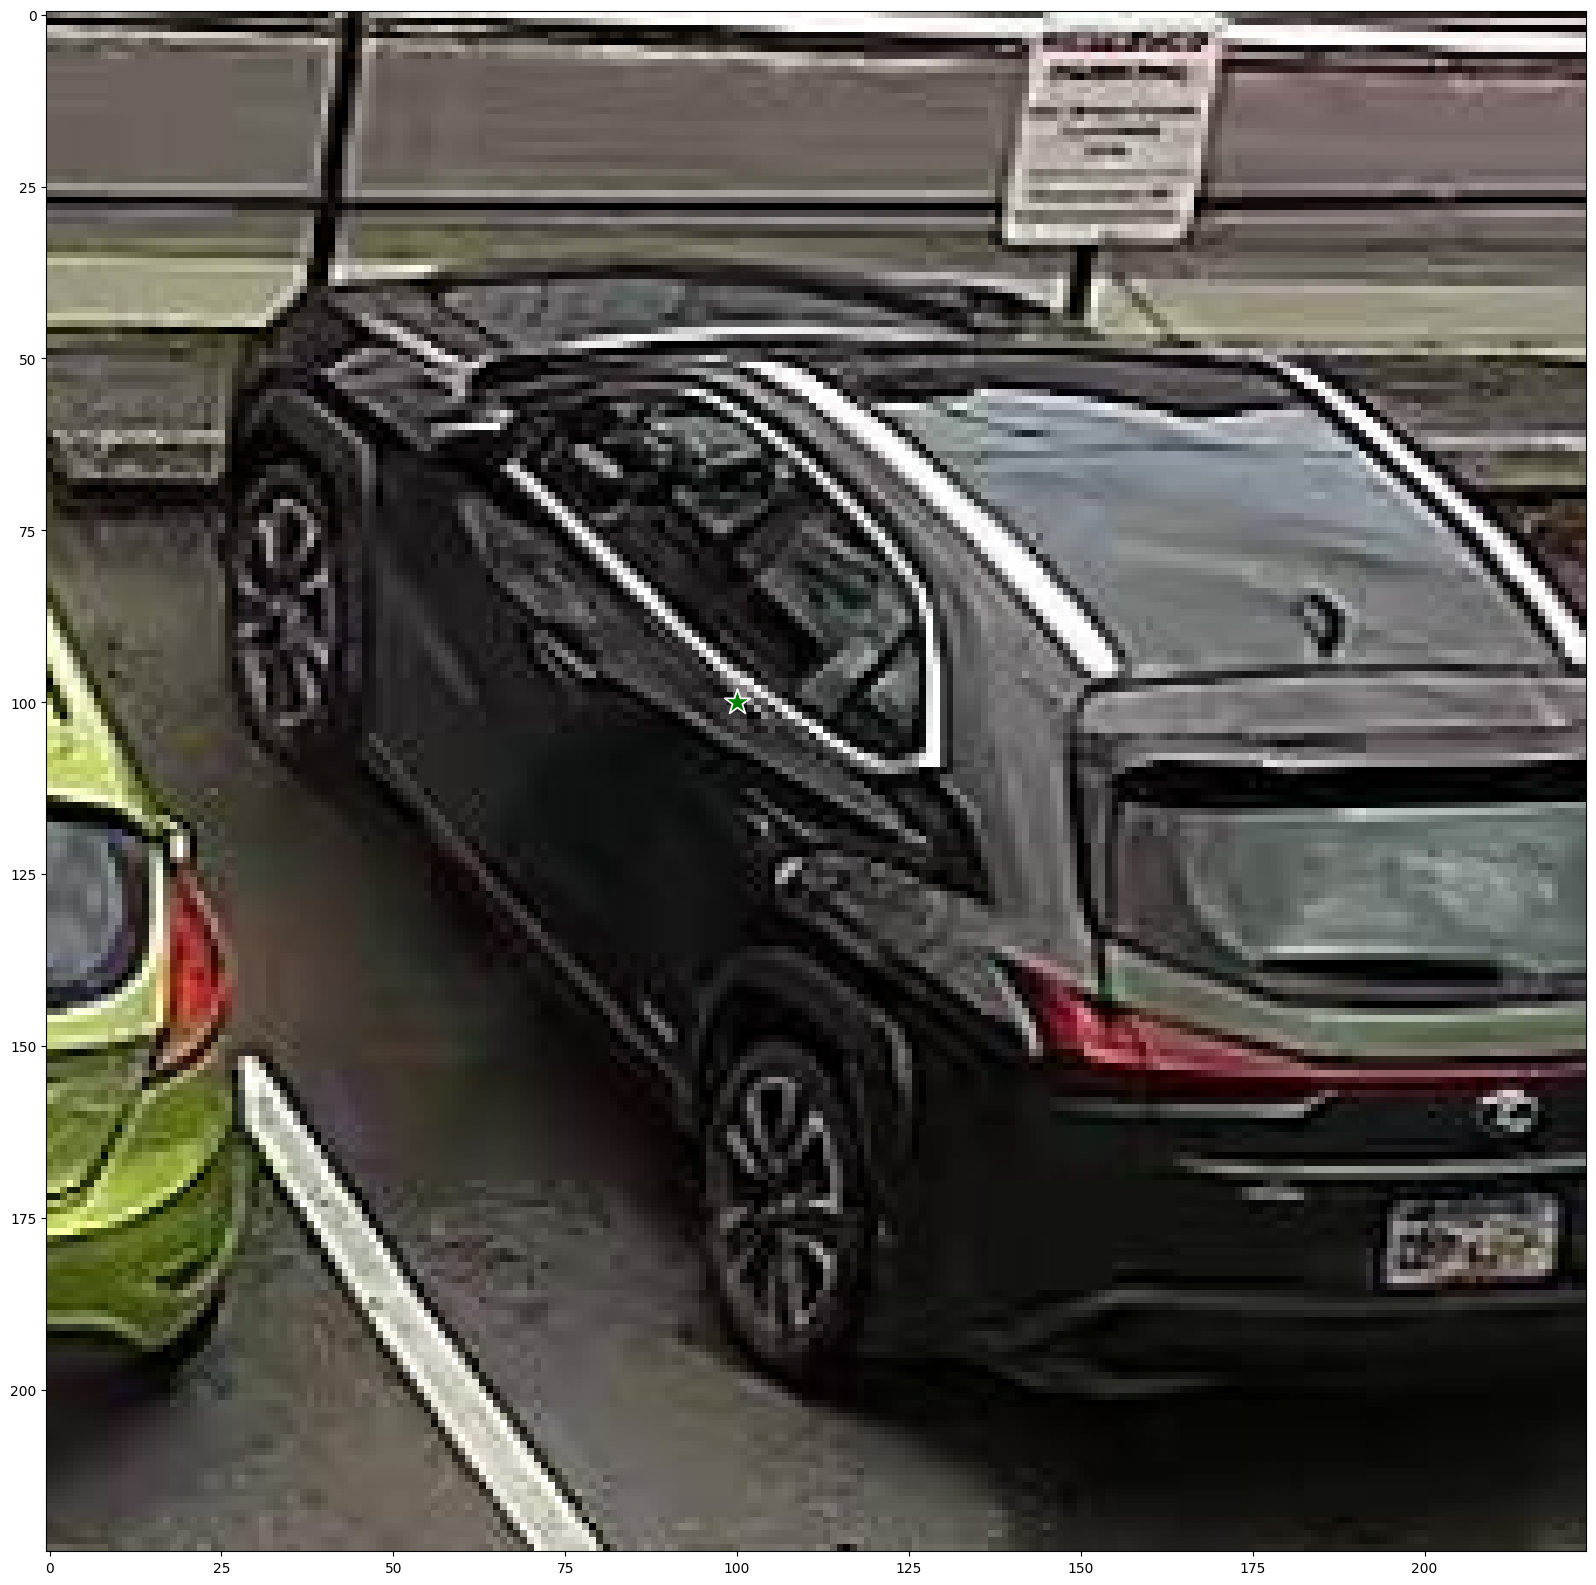

In [53]:
input_point = np.array([[100, 100]])
input_label = np.array([1])

plt.figure(figsize=(20,20))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [56]:
masks, scores, logits = predictor.predict(point_coords=input_point, 
                                          point_labels=input_label, 
                                          multimask_output=True)

In [ ]:
masks.shape

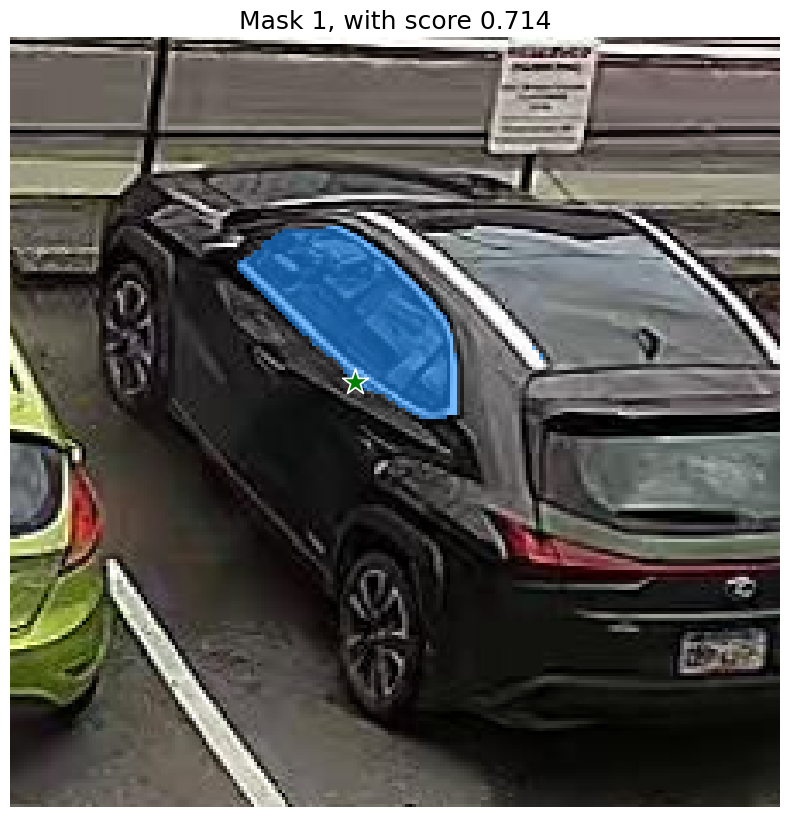

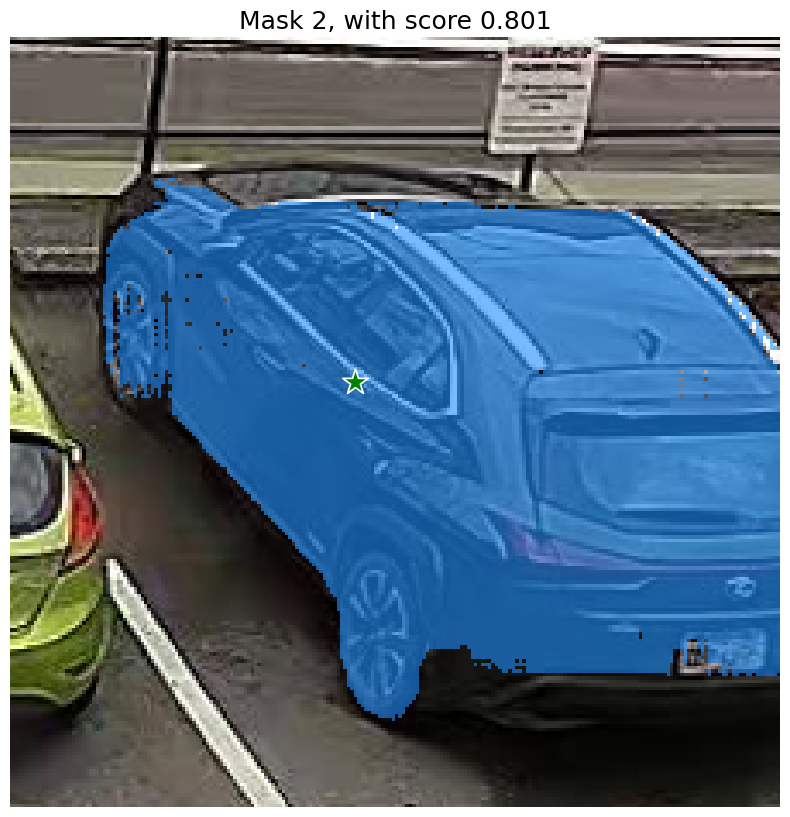

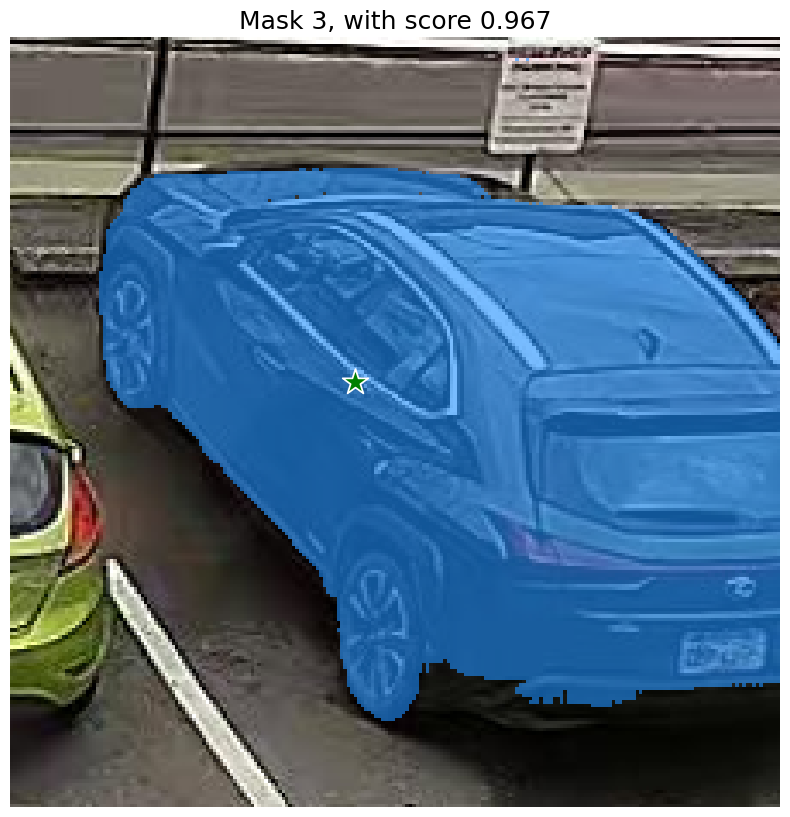

In [57]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, with score {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()